In [12]:
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu

df = pd.read_excel('Infiltration vs Metastases_abscesses.xlsx')
df

,Mouse number,Group,Infiltration_score,Liver metastases,Liver abscesses
0,308,Control,0.182,M2,A2
1,309,Control,1.923,M3,A1
2,312,Treated,1.239,M0,A0
3,314,Treated,0.284,M2,A2
4,317,Treated,0.744,M3,A3
5,319,Control,2.024,M3,A3
6,320,Treated,2.361,M0,A1
7,321,Control,0.586,M3,A1
8,322,Control,1.183,M3,A2
9,327,Treated,0.394,M3,A2


In [14]:
# Krskal-Wallis test - Metastases
metastases_groups = [df[df['Liver metastases'] == cell]['Infiltration_score'] for cell in df['Liver metastases'].unique()]
stat, p = kruskal(*metastases_groups)
print(f"Kruskal-Wallis test (Liver Metastases): stat={stat:.2f}, p={p:.4f}")

# Krskal-Wallis test - Necrosis
abscesses_groups = [df[df['Liver abscesses'] == n]['Infiltration_score'] for n in df['Liver abscesses'].unique()]
kruskal_result_abscesses = kruskal(*abscesses_groups)
print(f"Kruskal-Wallis test (Liver Abscesses): stat= {kruskal_result_abscesses.statistic:.2f}, p = {kruskal_result_abscesses.pvalue:.4f}")

Kruskal-Wallis test (Liver Metastases): stat=4.94, p=0.1760
Kruskal-Wallis test (Liver Abscesses): stat= 4.62, p = 0.2017


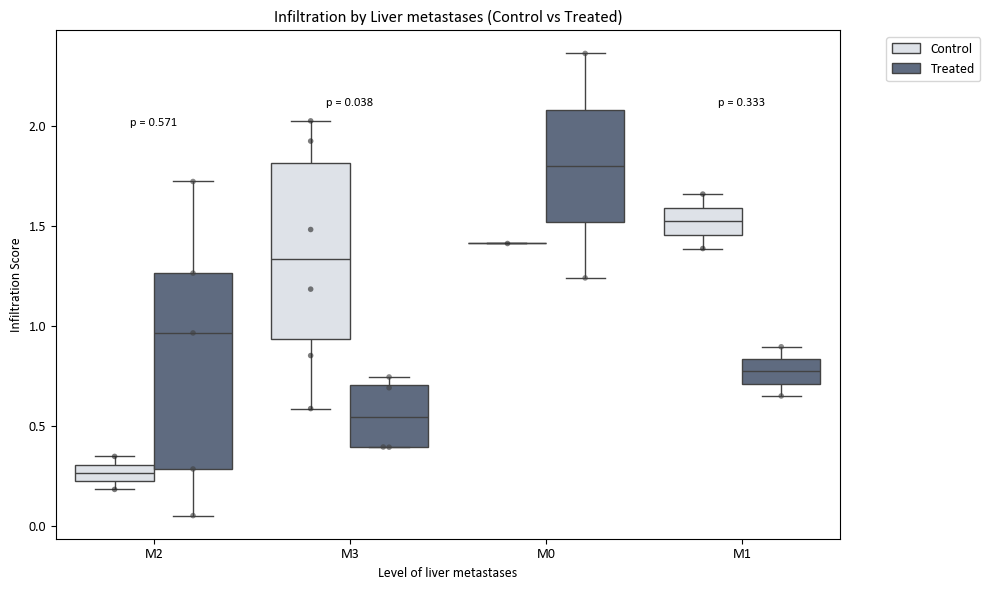

In [83]:
plt.rcParams['font.family'] = 'Calibri'

colors = ["#DCE1EA", "#5A6A85"]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Liver metastases', y='Infiltration_score', hue='Group', data=df, palette=colors)
sns.swarmplot(x='Liver metastases', y='Infiltration_score', hue='Group', data=df,
              dodge=True, palette='dark:.25', size=4, alpha=0.6)

# Remove duplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], bbox_to_anchor=(1.05, 1), loc='upper left')

# Add p-value annotations (Mann-Whitney U test) per category
livermes = df['Liver metastases'].unique()
x_ticks = range(len(livermes))

custom_heights = [2.0, 2.1, -1, 2.1]  # Manually defined Y positions

for i, ct in enumerate(livermes):
    sub = df[df['Liver metastases'] == ct]
    control_vals = sub[sub['Group'] == 'Control']['Infiltration_score']
    treated_vals = sub[sub['Group'] == 'Treated']['Infiltration_score']

    if len(control_vals) > 1 and len(treated_vals) > 1:
        stat, p = mannwhitneyu(control_vals, treated_vals, alternative='two-sided')
        y_max = custom_heights[i]  
        plt.text(i, y_max, f"p = {p:.3f}", ha='center', fontsize=9)

plt.xlabel("Level of liver metastases")
plt.ylabel("Infiltration Score")
plt.title("Infiltration by Liver metastases (Control vs Treated)")
plt.tight_layout()
#plt.savefig("Infiltration vs Liver metastases_p_poster.png", dpi=300, bbox_inches='tight')
plt.show()

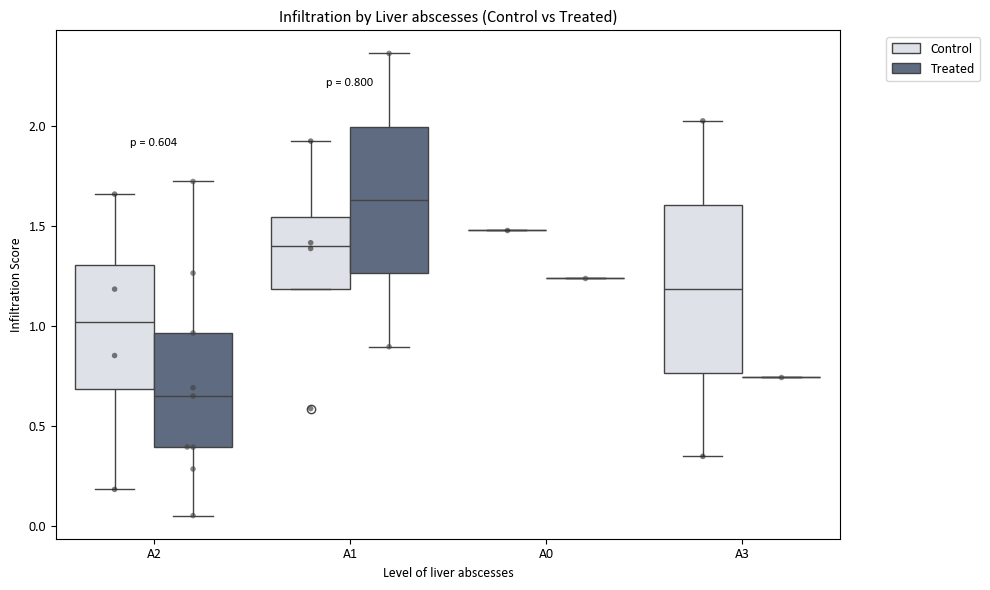

In [88]:
plt.rcParams['font.family'] = 'Calibri'

colors = ["#DCE1EA", "#5A6A85"]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Liver abscesses', y='Infiltration_score', hue='Group', data=df, palette=colors)
sns.swarmplot(x='Liver abscesses', y='Infiltration_score', hue='Group', data=df,
              dodge=True, palette='dark:.25', size=4, alpha=0.6)

# Remove duplicate legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], bbox_to_anchor=(1.05, 1), loc='upper left')

# Add p-value annotations (Mann-Whitney U test) per category
liverabsc = df['Liver abscesses'].unique()
x_ticks = range(len(liverabsc))

custom_heights = [1.9, 2.2, 2.1, 1]  # Manually defined Y positions

for i, ct in enumerate(liverabsc):
    sub = df[df['Liver abscesses'] == ct]
    control_vals = sub[sub['Group'] == 'Control']['Infiltration_score']
    treated_vals = sub[sub['Group'] == 'Treated']['Infiltration_score']

    if len(control_vals) > 1 and len(treated_vals) > 1:
        stat, p = mannwhitneyu(control_vals, treated_vals, alternative='two-sided')
        y_max = custom_heights[i] 
        plt.text(i, y_max, f"p = {p:.3f}", ha='center', fontsize=9)

plt.xlabel("Level of liver abscesses")
plt.ylabel("Infiltration Score")
plt.title("Infiltration by Liver abscesses (Control vs Treated)")
plt.tight_layout()
#plt.savefig("Infiltration vs Liver Abscesses_p_poster.png", dpi=300, bbox_inches='tight')
plt.show()